Campaign Response Analysis: Who Converts and Why?

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("marketing_campaign.csv", sep=";")
df.head()


Saving marketing_campaign.csv to marketing_campaign (3).csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [6]:
df['Response'].value_counts(normalize=True)


,proportion
Response,
0,0.850893
1,0.149107


<Axes: xlabel='Response', ylabel='Income'>

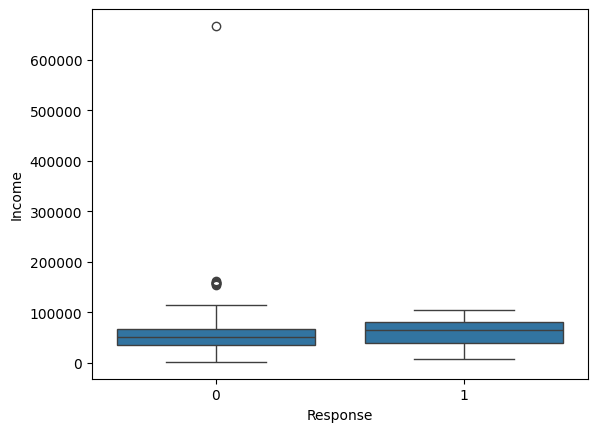

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = df.dropna(subset=['Income'])
sns.boxplot(x='Response', y='Income', data=df_clean)


<Axes: xlabel='Marital_Status', ylabel='count'>

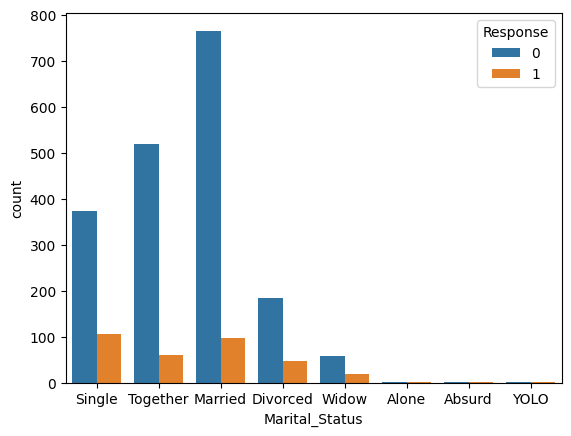

In [8]:
pd.crosstab(df['Marital_Status'], df['Response'], normalize='index')  # conversion rate
sns.countplot(x='Marital_Status', hue='Response', data=df)


<Axes: xlabel='Education', ylabel='count'>

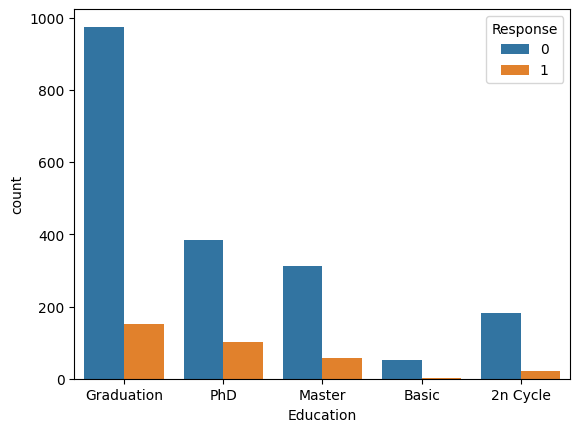

In [9]:
pd.crosstab(df['Education'], df['Response'], normalize='index')
sns.countplot(x='Education', hue='Response', data=df)


<Axes: xlabel='Response', ylabel='Recency'>

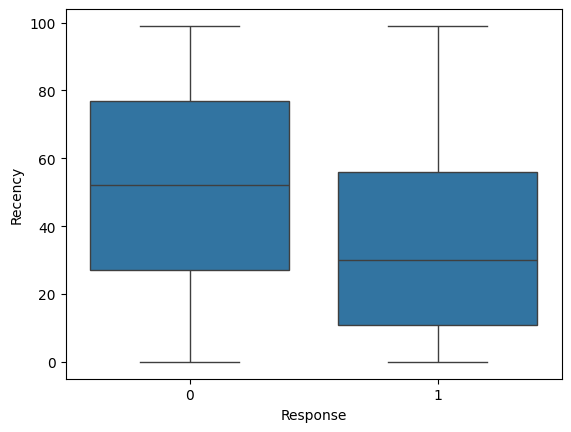

In [10]:
sns.boxplot(x='Response', y='Recency', data=df)


In [13]:
from scipy.stats import ttest_ind

converted = df[df['Response'] == 1]['Income'].dropna()
not_converted = df[df['Response'] == 0]['Income'].dropna()
ttest_ind(converted, not_converted)





TtestResult(statistic=np.float64(6.316420548976486), pvalue=np.float64(3.2255685843409974e-10), df=np.float64(2214.0))

In [14]:
print("Converted mean income:", converted.mean())
print("Not converted mean income:", not_converted.mean())

Converted mean income: 60209.67567567567
Not converted mean income: 50839.13276686139
